In [1]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /Users/tarasbohdan/Desktop/projects/idea-contest-2023/ideation-api


In [2]:
# !pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'

In [3]:
# !mkdir -p {HOME}/weights
# !wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights

In [4]:
import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

/Users/tarasbohdan/Desktop/projects/idea-contest-2023/ideation-api/weights/sam_vit_h_4b8939.pth ; exist: True


In [5]:
import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

In [6]:
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

In [7]:
mask_generator = SamAutomaticMaskGenerator(sam)

In [8]:
# !wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg -P {HOME}/data
# !wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg -P {HOME}/data
# !wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg -P {HOME}/data
# !wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg -P {HOME}/data

In [9]:
import os

IMAGE_NAME = "dog.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

In [10]:
import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [11]:
test = image_bgr.astype('float32')

In [12]:
print(image_rgb.shape)
print(image_rgb.dtype)

(1280, 720, 3)
uint8


In [14]:
sam_result = mask_generator.generate(image_rgb)

In [15]:
print(sam_result[0].keys())

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


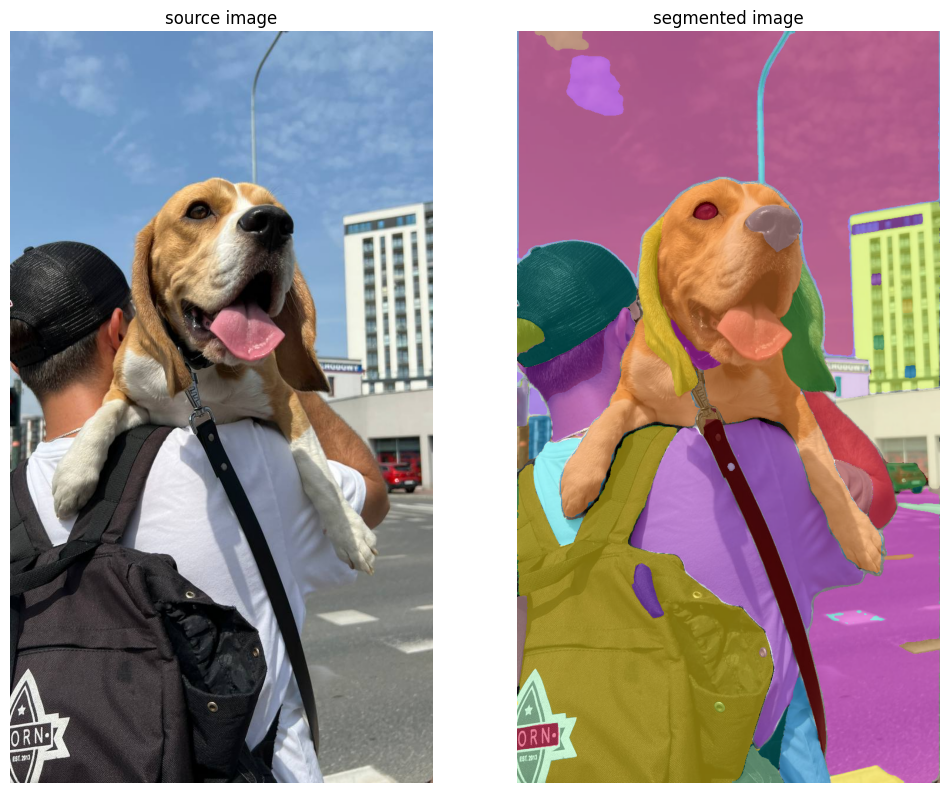

In [16]:
mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)